# Import Libraries

In [1]:
import os
import pandas as pd
from utils.lstm_model_ss import *

2023-06-12 11:53:37.666828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 11:53:37.862375: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-12 11:53:37.862412: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-12 11:53:39.305339: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Import The Dataset

## Training Set

In [2]:
df_list = []

for i in range(1, 4):
    df = pd.read_csv(
        f"./dataset/nprepros_pond{i}_linear.csv", index_col=0, parse_dates=True
    )
    df_list.append(df)
    
dataset = pd.concat(df_list)
dataset = dataset.drop(dataset.columns[-2:], axis=1)

## Test Set

In [3]:
test_dataset = pd.read_csv(
    "./dataset/nprepros_pond4_linear.csv", index_col=0, parse_dates=True
)
test_dataset = test_dataset.drop(test_dataset.columns[-2:], axis=1)

# Hyperparameters

In [4]:
# Model Parameters
NUM_OF_LAYERS: int = 2
NUM_OF_NEURONS_FOR_EACH_LAYER: tuple = (64, 32)
DROPOUT_REGULARIZATION: tuple = (0.2, 0.2)
ACTIVATION_FUNCTION = "tanh"
OPTIMIZER = "adam"
METRICS: tuple = ('mae', 'mean_squared_error', 'accuracy') # loss, metrics[0], metrics[1]
SHUFFLE: bool = True
EPOCHS: int = 16

# Dataset Parameters
DATASET = dataset
TEST_DATASET = test_dataset
TRAIN_SIZE: float = 0.9
BATCH_SIZE: int = 64
BUFFER_SIZE: int = len(DATASET)
INPUT_WIDTH: int = 3

# Class Instantiation

In [5]:
friza: LSTMModel = LSTMModel()

friza.num_layers = NUM_OF_LAYERS
friza.num_neurons = NUM_OF_NEURONS_FOR_EACH_LAYER
friza.dropout_regularization = DROPOUT_REGULARIZATION
friza.hyperparameters = (
    ACTIVATION_FUNCTION,
    METRICS,
    OPTIMIZER,
    BATCH_SIZE,
    EPOCHS,
    BUFFER_SIZE,
    INPUT_WIDTH,
    len(DATASET.columns),
)
friza.dataset = (DATASET, TRAIN_SIZE, SHUFFLE)

2023-06-12 11:53:43.864865: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-12 11:53:43.864944: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-12 11:53:43.865003: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archlinux): /proc/driver/nvidia/version does not exist
2023-06-12 11:53:43.865517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Model

## Build & Inspect

In [6]:
friza.model()
friza.inspect()  # TRUE, TRUE, TRUE

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 3, 128)           36352     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 128)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 77,958
Trainable params: 77,958
Non-traina

## Training

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
20/21 [===========================>..] - ETA: 0s - loss: 0.3159 - mean_squared_error: 0.1643 - accuracy: 0.4250WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f6340bc9200> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
21/21 [==============================] - 16s 149ms/step - loss: 0.3132 - mean_squared_error: 0.1619 - accuracy: 0.4365 - val_loss: 0.1750 - val_mean_squared_error: 0.0707 - val_accuracy: 0.9931
Epoch 2/3
21/21 [==============================] - 0s 16ms/step - loss: 0.1660 - mean_squared_error: 0.0437 - accuracy: 0.8608 - val_loss: 0.1240 - val_mean_squared_error: 0.0303 - val_accuracy: 0.9931
Epoch 3/3
21/21 [==============================] - 0s 19ms/step - loss: 0.1196 - mean_squared_error: 0.0248 - accuracy: 0.8061 - val_loss: 0.1044 - val_mean_squared_error: 0.0162 - val_accuracy: 0.7014


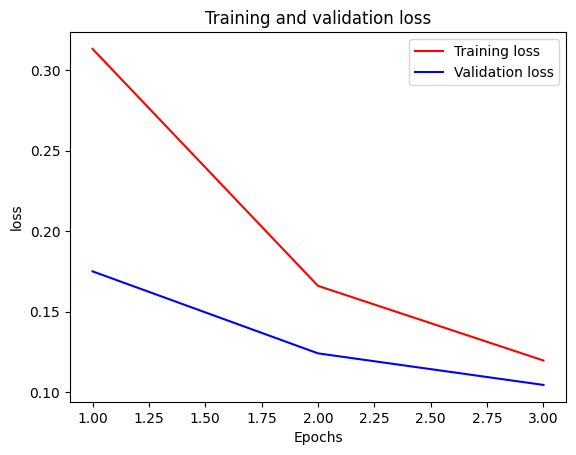

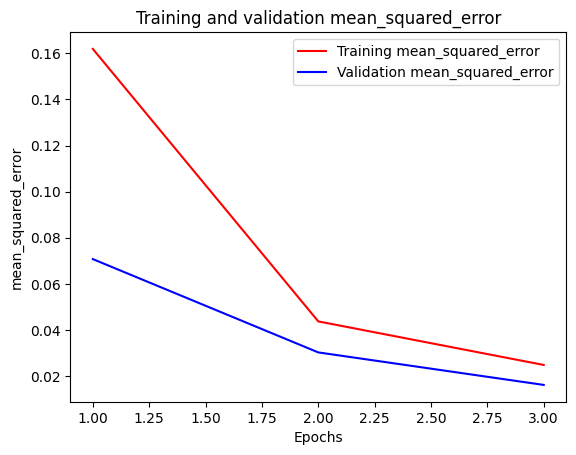

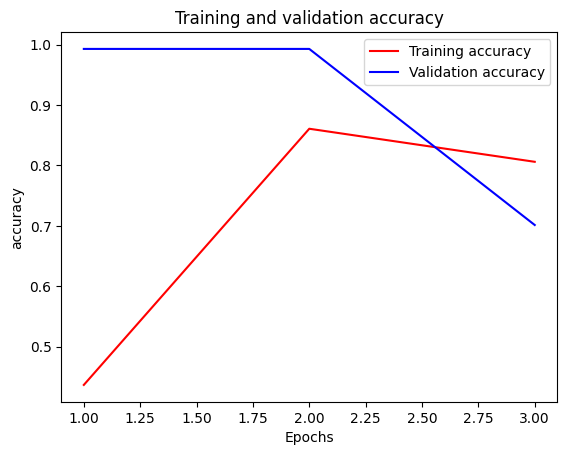

In [7]:
friza.train()
friza.plot_history()

## Prediction

loss: 0.14910762012004852
mean_squared_error: 0.03686618059873581
accuracy: 0.8528138399124146
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


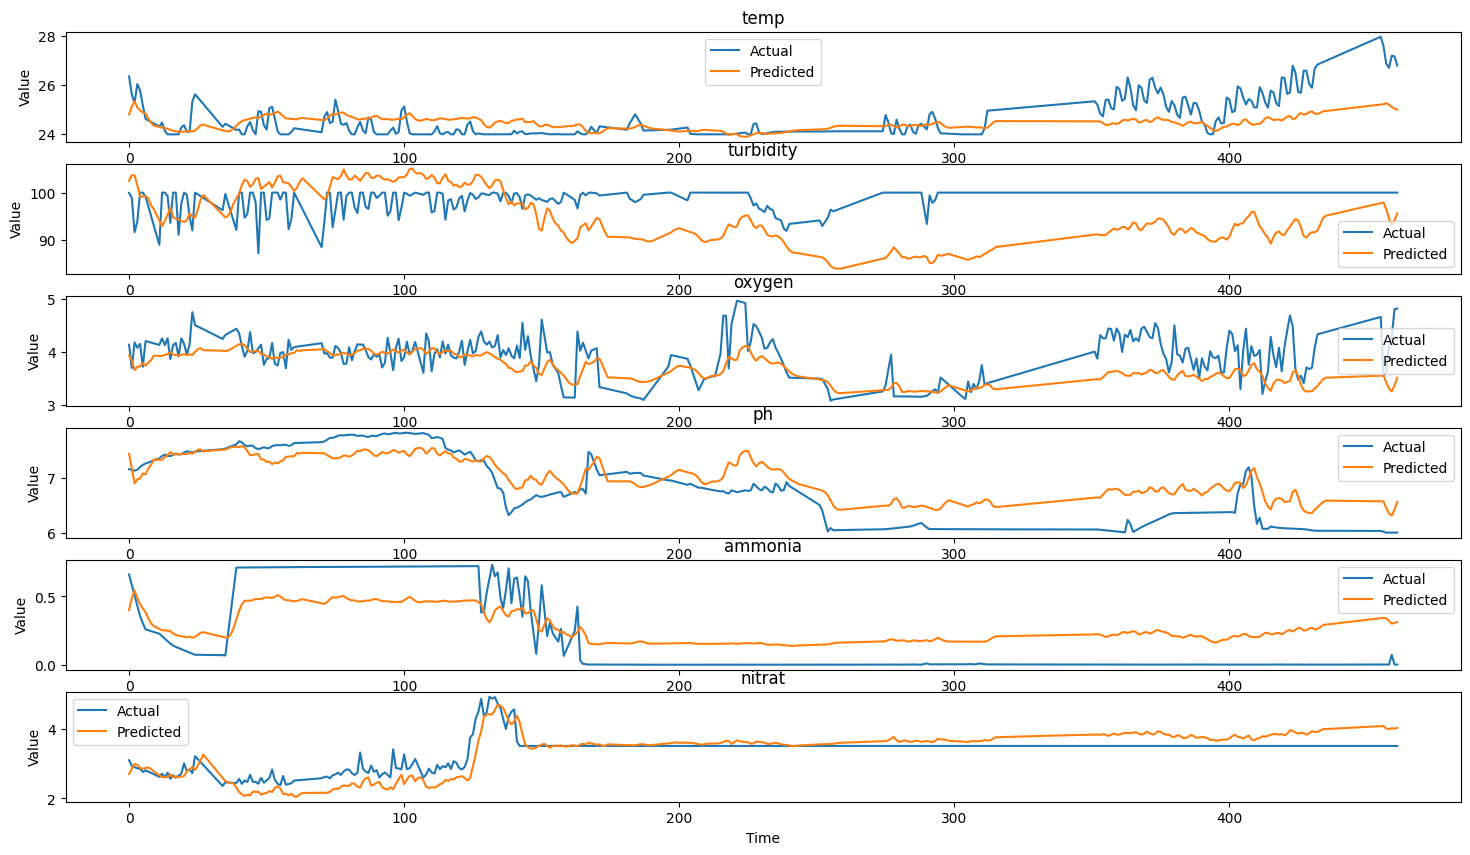

In [8]:
friza.predict(TEST_DATASET)

## Save The Model

In [9]:
model_dir = os.listdir()

if 'models' not in model_dir:
    os.mkdir('models')

friza.save('models/friza_3_model.h5', 'h5', scaler=True)